In [11]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('quaterfinals.csv')

# 분석할 4팀
teams = ['England', 'Italy', 'Spain', 'Germany']

# 퍼센트(%) 컬럼 정리
percent_cols = [col for col in df.columns if '(%)' in col]

def clean_percent_column(s):
    return pd.to_numeric(s.str.replace('%', '').str.strip(), errors='coerce')

for col in percent_cols:
    df[col] = clean_percent_column(df[col].astype(str))

# 숫자 컬럼 추출 (Home 또는 Away로 시작하는 것)
num_cols = [col for col in df.columns if col.startswith('Home') or col.startswith('Away')]

def get_team_stats(team):
    home_games = df[df['HomeTeam'] == team]
    home_stats = home_games[[col for col in num_cols if col.startswith('Home')]].copy()
    home_stats.columns = [col.replace('Home', '') for col in home_stats.columns]

    away_games = df[df['AwayTeam'] == team]
    away_stats = away_games[[col for col in num_cols if col.startswith('Away')]].copy()
    away_stats.columns = [col.replace('Away', '') for col in away_stats.columns]

    team_stats = pd.concat([home_stats, away_stats], ignore_index=True)
    team_stats = team_stats.apply(pd.to_numeric, errors='coerce')
    return team_stats

# 각 팀별 평균 저장할 딕셔너리
team_means = {}

for team in teams:
    stats = get_team_stats(team)
    team_means[team] = stats.mean()

# 팀별 평균 출력
for team, means in team_means.items():
    print(f"==== {team} 경기 평균 ====")
    print(means)
    print()


==== England 경기 평균 ====
Team                      NaN
Goals                   3.250
Shots                  17.750
ShotsOnTarget           5.750
xG                      2.915
BigChances              5.000
Possession(%)          61.500
Passes(%)              81.500
Coner                   5.500
Yellow                  0.750
Red                     0.000
Fouls                  10.250
Tackles(%)             58.250
Clearances             22.000
Interceptions           6.250
ErrorsLeadingtoShot     1.250
ErrorsLeadingtoGoal     0.500
Saves                   2.750
dtype: float64

==== Italy 경기 평균 ====
Team                      NaN
Goals                   1.250
Shots                  14.250
ShotsOnTarget           5.250
xG                      1.605
BigChances              2.000
Possession(%)          41.500
Passes(%)              76.750
Coner                   4.000
Yellow                  1.500
Red                     0.000
Fouls                   6.250
Tackles(%)             55.750
Clearanc

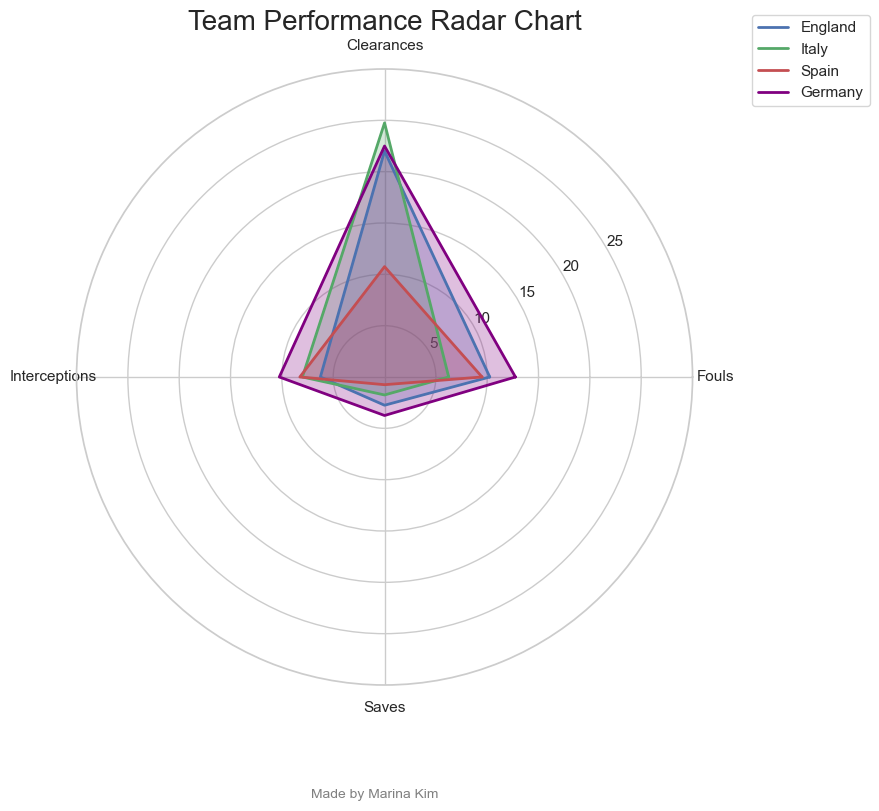

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 팀 데이터 (같은 데이터 사용)
labels = ['Fouls', 'Clearances', 'Interceptions', 'Saves']
num_vars = len(labels)

# 값 세팅 (팀별 데이터 리스트)
values = {
    'England': [10.25, 22.0, 6.25, 2.75],
    'Italy': [6.25, 24.75, 8.0, 1.75],
    'Spain': [9.5, 10.75, 8.25, 0.75],
    'Germany': [12.75, 22.50, 10.25, 3.75]
}

# 각 팀 색깔 지정
colors = ['b', 'g', 'r', 'purple']

# 레이더 차트 각도 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, (team, vals) in enumerate(values.items()):
    vals += vals[:1]  # 시작점으로 값 반복해서 닫기
    ax.plot(angles, vals, color=colors[idx], linewidth=2, label=team)
    ax.fill(angles, vals, color=colors[idx], alpha=0.25)

# 각 축 라벨 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 값 범위 설정 (적절히 조절하세요)
ax.set_rlabel_position(30)
ax.set_yticks([5, 10, 15, 20, 25])
ax.set_yticklabels(['5', '10', '15', '20', '25'])
ax.set_ylim(0, 30)

fig.text(
    0.5, -0.02,
    'Made by Marina Kim',
    ha='center', va='top',
    fontsize=10, color='gray')

plt.title('Team Performance Radar Chart', size=20, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('defence_rader_sf.png', dpi=300, bbox_inches='tight')
plt.show()


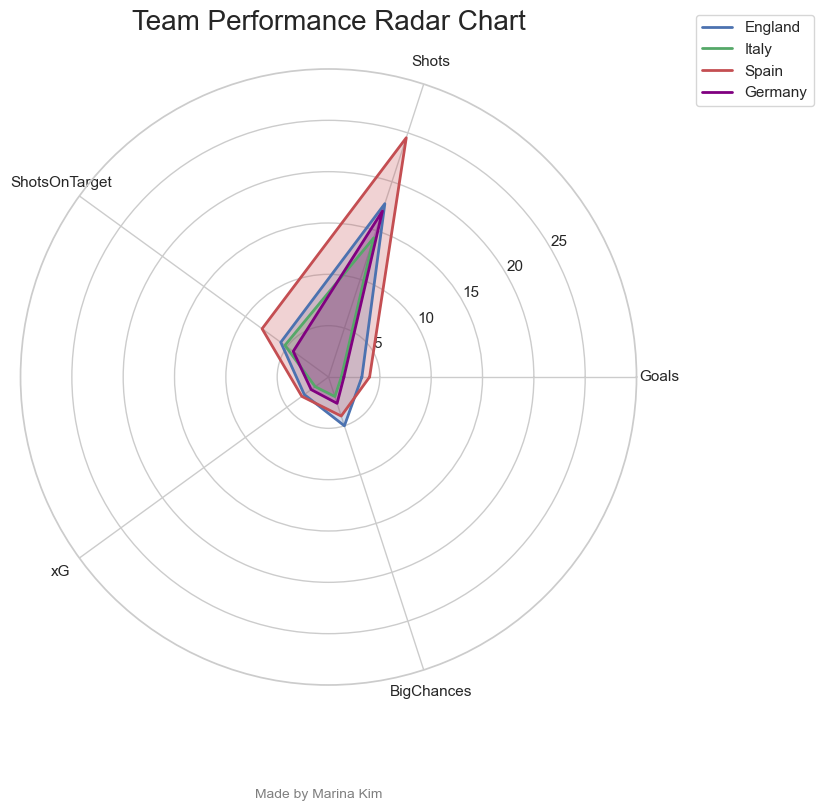

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 팀 데이터 (같은 데이터 사용)
labels = ['Goals', 'Shots', 'ShotsOnTarget', 'xG', 'BigChances']
num_vars = len(labels)

# 값 세팅 (팀별 데이터 리스트)
values = {
    'England': [3.25, 17.75, 5.75, 2.915, 5.0],
    'Italy': [1.25, 14.25, 5.25, 1.605, 2.0],
    'Spain': [4.0, 24.5, 8.0, 3.2125, 4.0],
    'Germany': [1.5, 17.0, 4.25, 2.09, 2.70]
}

# 각 팀 색깔 지정
colors = ['b', 'g', 'r', 'purple']

# 레이더 차트 각도 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, (team, vals) in enumerate(values.items()):
    vals += vals[:1]  # 시작점으로 값 반복해서 닫기
    ax.plot(angles, vals, color=colors[idx], linewidth=2, label=team)
    ax.fill(angles, vals, color=colors[idx], alpha=0.25)

# 각 축 라벨 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 값 범위 설정 (적절히 조절하세요)
ax.set_rlabel_position(30)
ax.set_yticks([5, 10, 15, 20, 25])
ax.set_yticklabels(['5', '10', '15', '20', '25'])
ax.set_ylim(0, 30)

fig.text(
    0.5, -0.02,
    'Made by Marina Kim',
    ha='center', va='top',
    fontsize=10, color='gray')

plt.title('Team Performance Radar Chart', size=20, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('attack_rader_sf.png', dpi=300, bbox_inches='tight')
plt.show()
